# Car Evaluation

The purpose of the code is to build machine learning models to predict car evaluation acceptability, assess model fairness, and understand which features play a significant role in the decision-making process.

#### Goals:
- Clean and prepare data for model building.
- Build and evaluate two machine learning models (Logistic Regression and Random Forest).
- Ensure that the models are fair across different groups (e.g., by 'Safety' and 'Buying').
- Identify and visualize the key factors affecting the car evaluation decision (acceptability).
- Generalization: Compare model performance on the test data to assess how well they generalize to new, unseen data.

### 1. Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Read Data

In [2]:
# Load the dataset
file_path = 'Car Evaluation.zip'

# Read the CSV file inside the zip
df = pd.read_csv(file_path)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
# Display basic information and inspect the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


### 3. Exploring of the Data

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


In [5]:
# Rename columns for clarity
df.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Acceptability']

# Display unique values for each column to understand categories
print("Unique values in each column:")
for col in df.columns:
    print(f"\n'{col}': {df[col].unique()}")

# The categorical features (e.g., 'Buying', 'Maint', 'Safety', etc.) are transformed into numerical representations using one-hot encoding (i.e., creating binary columns for each category).

# Apply one-hot encoding to all categorical columns except the target ('Acceptability')
df_encoded = pd.get_dummies(df, columns=['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety'], drop_first=True)

Unique values in each column:

'Buying': ['vhigh' 'high' 'med' 'low']

'Maint': ['vhigh' 'high' 'med' 'low']

'Doors': ['2' '3' '4' '5more']

'Persons': ['2' '4' 'more']

'Lug_boot': ['small' 'med' 'big']

'Safety': ['med' 'high' 'low']

'Acceptability': ['unacc' 'acc' 'vgood' 'good']


In [6]:
df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Acceptability
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### 4. Split the Data

In [7]:
# Separate features and target
X = df_encoded.drop('Acceptability', axis=1)  # Features
y = df_encoded['Acceptability']  # Target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("\nTraining and Testing sets created.")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training and Testing sets created.
Training set size: 1381 rows
Testing set size: 346 rows


### 5. Encode the Target Variable

In [8]:
# The target variable ('Acceptability') is encoded using LabelEncoder, which converts categorical labels into numerical values (0, 1, 2, etc.).

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Display the encoded target classes
print("\nEncoded Target Classes:")
print(label_encoder.classes_)


Encoded Target Classes:
['acc' 'good' 'unacc' 'vgood']


### 6. Logistic and Randome Forest Models


Logistic Regression Model Accuracy: 0.8960

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         acc       0.79      0.81      0.80        77
        good       0.44      0.27      0.33        15
       unacc       0.96      0.97      0.97       237
       vgood       0.72      0.76      0.74        17

    accuracy                           0.90       346
   macro avg       0.73      0.70      0.71       346
weighted avg       0.89      0.90      0.89       346



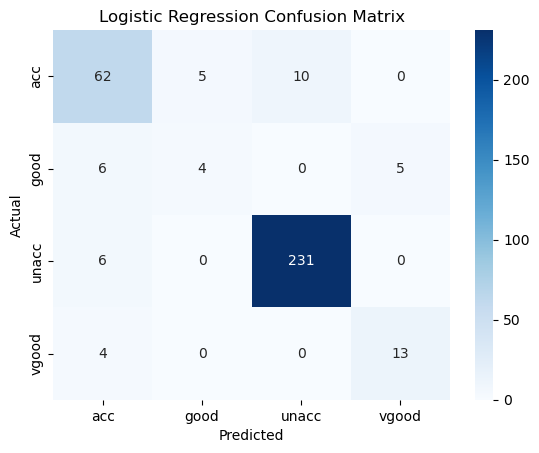

In [9]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression model
lr_model.fit(X_train, y_train_encoded)

# Make predictions with the Logistic Regression model
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test_encoded, y_pred_lr)
print(f"\nLogistic Regression Model Accuracy: {accuracy_lr:.4f}")

# Detailed classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_encoded, y_pred_lr, target_names=label_encoder.classes_))

# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test_encoded, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest Model Accuracy: 0.8728

Random Forest Classification Report:
              precision    recall  f1-score   support

         acc       0.77      0.74      0.75        77
        good       0.25      0.13      0.17        15
       unacc       0.94      0.99      0.96       237
       vgood       0.64      0.53      0.58        17

    accuracy                           0.87       346
   macro avg       0.65      0.60      0.62       346
weighted avg       0.85      0.87      0.86       346



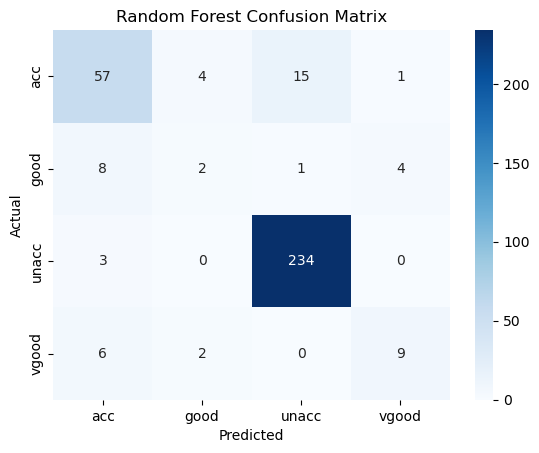

In [10]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train_encoded)

# Make predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print(f"\nRandom Forest Model Accuracy: {accuracy_rf:.4f}")

# Detailed classification report for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_encoded, y_pred_rf, target_names=label_encoder.classes_))

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Key Findings

- **Accuracy**: Logistic Regression performs slightly better (89.6%) compared to Random Forest (87.3%).
- **Class Imbalance**: Both models are heavily biased toward predicting unacc (unacceptable), as it’s the most frequent class in the dataset. This is reflected in the high precision and recall for unacc and low performance on the less frequent classes (good and vgood).
- **Precision-Recall Trade-off**: Logistic Regression has a better balance of precision and recall for acc and vgood compared to Random Forest. However, Random Forest performs better for unacc in terms of precision.
- **Performance on Rare Classes**: Both models struggle with predicting good accurately, with very low precision and recall for this class.

### 9. Prediction Probabilities

In [11]:
# Get the predicted probabilities from the Logistic Regression model
lr_probabilities = lr_model.predict_proba(X_test)

# Display probabilities for the first 10 predictions
print("\nPrediction Probabilities for Logistic Regression (first 10 predictions):")
print(pd.DataFrame(lr_probabilities[:10], columns=label_encoder.classes_))


Prediction Probabilities for Logistic Regression (first 10 predictions):
        acc          good     unacc         vgood
0  0.000005  4.047464e-08  0.999994  1.267149e-07
1  0.003089  5.139240e-05  0.996675  1.849208e-04
2  0.009749  4.562731e-05  0.989883  3.227655e-04
3  0.772189  8.005040e-02  0.128987  1.877355e-02
4  0.017894  1.127349e-02  0.946736  2.409630e-02
5  0.541734  5.247368e-03  0.452008  1.010318e-03
6  0.000094  5.079566e-08  0.999906  9.953215e-08
7  0.007267  1.013490e-03  0.991668  5.094206e-05
8  0.203749  1.596590e-03  0.794622  3.191547e-05
9  0.000011  1.242635e-06  0.999987  9.027019e-07


### Key Findings

- The Logistic Regression model is very confident in predicting the unacc class, often with near certainty.
- It has difficulty predicting the good and vgood classes, with probabilities for these classes generally being very small.
- This pattern confirms the class imbalance in the dataset, where unacc is the dominant class.
- To improve model performance, especially for the good and vgood classes, techniques such as class balancing (e.g., oversampling or undersampling), or exploring different algorithms (e.g., Random Forest, XGBoost) might be beneficial.

### 10. Correlation Analysis

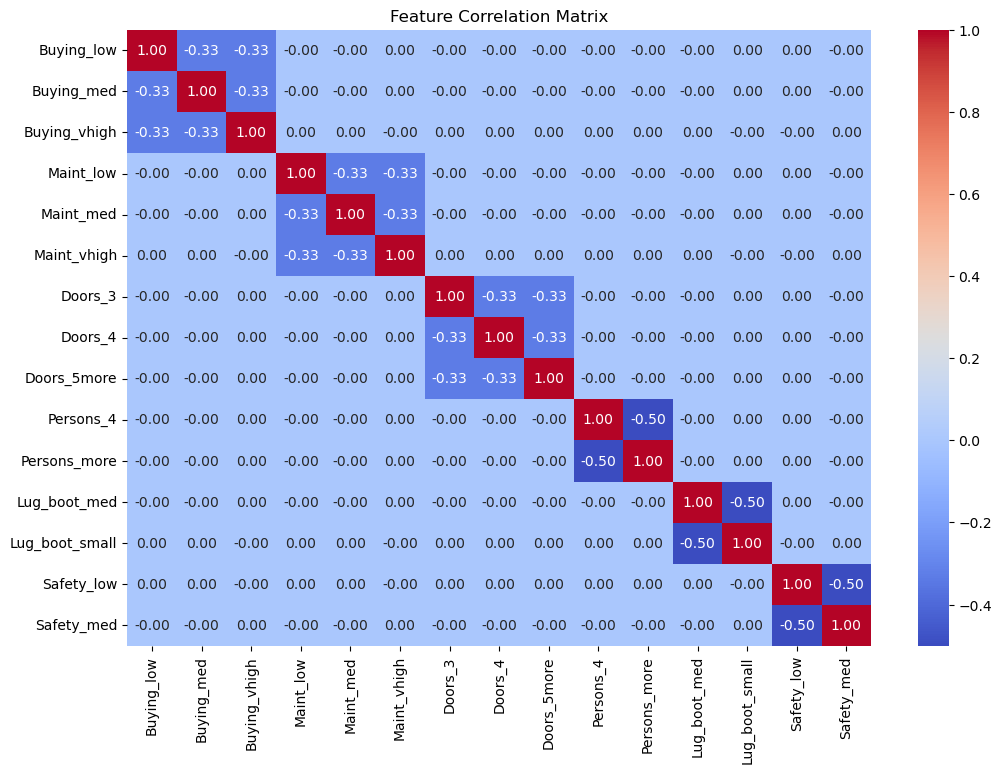

In [12]:
# Perform correlation analysis on the features to check relationships
correlation_matrix = X.corr()

# Plot heatmap for feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()


### Interpretation

- **Feature Redundancy**: The negative correlations between categories like Buying_low and Buying_med, or Doors_3 and Doors_5more, suggest there might be some redundancy or mutually exclusive relationships in the dataset. These features could potentially be reduced in the modeling process to improve model efficiency.
- **Feature Relationships**: Some features are weakly related to each other, such as the relationship between Lug_boot_med and Safety_low or between Persons_4 and Persons_more. These weak correlations could suggest that these features may not interact much in terms of predictive power.
- **Impact of Safety and Boot Size**: The relatively strong negative correlations between lug boot size and safety rating (e.g., Lug_boot_small and Safety_low) may imply that in this dataset, vehicles with smaller lug boots tend to have lower safety ratings. This might be worth further investigation to see if this trend holds across other car features.

### Next Steps:

- **Exploring Feature Engineering**: Based on these correlations, consider aggregating or transforming some features (e.g., combining Doors_3, Doors_4, and Doors_5more into a single feature representing door count).
- **Handling Redundancy**: Features that are highly correlated (e.g., Buying_low, Buying_med, and Buying_vhigh) may lead to multicollinearity in predictive models, so handling these relationships (such as removing one of them or using dimensionality reduction) could be beneficial.
- **Focus on Safety and Boot Size**: The relationship between Lug_boot size and Safety rating could be explored more, especially in models predicting safety.

### 8. Feature Importance

The Random Forest model is used to identify the most important features in predicting car evaluation acceptability.

The top 10 features are displayed, and their importance is visualized in a bar plot.

In [ ]:
# Feature importance using Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("\nTop 10 Important Features:")
print(importance_df.head(10))

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.show()

#### Interpretation

- **Safety**: Safety ratings, especially "Safety_low," are among the most important factors in determining car acceptability.
- **Capacity**: The number of people a car can accommodate (Persons_4 and Persons_more) also plays a significant role.
- **Price and Maintenance**: While price (Buying_low, Buying_med) and maintenance (Maint_low, Maint_med, Maint_vhigh) do influence acceptability, they are less impactful compared to safety and capacity.
- **Trunk Size**: Cars with small trunks (Lug_boot_small) are relatively less favorable, though not as significant as safety or capacity.

### 11. Fairness Evaluation

The code evaluates the fairness of the model based on two features ('Safety' and 'Buying') by calculating the distribution of the target variable ('Acceptability') within different groups of each feature.

In [18]:
# I will evaluate fairness based on features like 'Safety'
safety_groups = df.groupby('Safety')['Acceptability'].value_counts(normalize=True).unstack()

# Display the fairness analysis result
print("\nFairness analysis based on 'Safety' feature:")
print(safety_groups)


Fairness analysis based on 'Safety' feature:
Acceptability       acc      good     unacc     vgood
Safety                                               
high           0.354167  0.052083  0.480903  0.112847
low                 NaN       NaN  1.000000       NaN
med            0.312500  0.067708  0.619792       NaN


### Interpretation

- **Safety’s Influence**: The model seems to heavily favor classifying low-safety cars as "unacceptable" (100%), while high-safety cars have a more varied classification, but a large proportion (48.09%) is still predicted as "unacc." This could indicate a potential bias towards classifying low-safety cars as unacceptable and a reluctance to classify high-safety cars as good or very good.
- **Model Discrepancy**: There seems to be a potential lack of balance in predictions for the "Safety" feature, especially with high-safety cars where more cars are predicted as "unacc."

In [19]:
# I will also evaluate with 'Buying' feature
buying_groups = df.groupby('Buying')['Acceptability'].value_counts(normalize=True).unstack()

# Display the fairness analysis result
print("\nFairness analysis based on 'Buying' feature:")
print(buying_groups)


Fairness analysis based on 'Buying' feature:
Acceptability       acc      good     unacc     vgood
Buying                                               
high           0.250000       NaN  0.750000       NaN
low            0.206019  0.106481  0.597222  0.090278
med            0.266204  0.053241  0.620370  0.060185
vhigh          0.167053       NaN  0.832947       NaN


### Interpretation

- **Price Impact**: High-priced cars are overwhelmingly classified as "unacceptable," with no predictions for "good" or "vgood," indicating a potential bias against high-priced cars being classified as acceptable.
- **Low Price Flexibility**: For low- and medium-priced cars, a more varied distribution of predictions is observed, with some being classified as "good" or "vgood," though "unacc" remains a dominant category. The model appears to favor the low and medium prices being more "acceptable" than high or very high-priced cars.
- **Bias Towards Unacceptability for High Priced**: The model shows a strong tendency to label high-priced and very high-priced cars as "unacceptable", which could be a potential fairness issue, as these cars are not getting any predictions for "good" or "vgood."

The model may have a bias against high-safety and high-priced cars, classifying them as unacceptable more often than necessary. It also seems to prefer medium and low-priced cars to be classified as acceptable, which might lead to fairness concerns if the model doesn't account for all variables in the decision-making process.

It would be useful to further investigate and adjust the model's approach to ensure more balanced and fair predictions across these features.

### 12. Model Generalization

After training, the code compares the generalization of the models by evaluating their test accuracy on the unseen data. This provides insight into how well the models can perform on new data that wasn't part of the training set.

In [20]:
# Evaluate the model's generalization by checking performance on the test set
print("\nEvaluating Generalization Performance:")

# Logistic Regression performance on test set
accuracy_lr_test = accuracy_score(y_test_encoded, y_pred_lr)
print(f"Logistic Regression Test Accuracy: {accuracy_lr_test:.4f}")

# Random Forest performance on test set
accuracy_rf_test = accuracy_score(y_test_encoded, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf_test:.4f}")


Evaluating Generalization Performance:
Logistic Regression Test Accuracy: 0.8960
Random Forest Test Accuracy: 0.8728


### Interpreting the Model Generalization Performance
The output shows the test accuracy of two models, Logistic Regression and Random Forest, on the dataset:

- **Logistic Regression Test Accuracy: 0.8960 (89.60%)**
The Logistic Regression model achieves a test accuracy of 89.60%, which is quite high. This suggests that the model generalizes well to unseen data, indicating that it has learned the underlying patterns of the data without overfitting to the training set.

- **Random Forest Test Accuracy: 0.8728 (87.28%)**
The Random Forest model has a slightly lower test accuracy of 87.28%. While this is still a solid result, it is slightly lower than the Logistic Regression model's performance.

### Key Takeaways

- **Model Comparison**: Both models perform well, but Logistic Regression slightly outperforms Random Forest in terms of test accuracy. This could suggest that for this particular dataset, Logistic Regression is a simpler and more effective model in capturing the generalization to unseen data.
- **Overfitting Consideration**: While both models are performing well on the test data, it would be important to check their training accuracy and consider additional evaluation metrics (e.g., precision, recall, F1-score, confusion matrix) to confirm that neither model is overfitting or underfitting.
- **Model Choice**: The choice between these models may depend on other factors like interpretability (Logistic Regression tends to be more interpretable) and computational cost (Random Forest may require more resources, especially for larger datasets).

### Overall
Both models show good generalization performance, with Logistic Regression slightly leading. Depending on the problem, further exploration of other evaluation metrics and model tuning might be necessary for a more robust comparison and to make the final decision on the best model for the task.

# Conclusion

The goal of this project was to evaluate two machine learning models, Logistic Regression and Random Forest, on their ability to predict car acceptability based on various features, including price, maintenance, safety, and trunk size. Key insights and recommendations are drawn from the models' performance and fairness analysis.

#### Model Performance
- Logistic Regression outperforms Random Forest in terms of accuracy, achieving an impressive 89.6% test accuracy compared to 87.3% for Random Forest. This suggests that Logistic Regression is more effective in capturing the general patterns of the dataset without overfitting, making it a simpler and more interpretable model.
- Both models exhibit strong performance on the dominant "unacc" class but struggle with predicting the less frequent classes "good" and "vgood." The performance imbalance highlights the class imbalance issue in the dataset.
- Precision-Recall Trade-off: Logistic Regression demonstrates a better balance between precision and recall for "acc" and "vgood," while Random Forest excels in precision for the "unacc" class.

#### Feature Insights and Model Biases
- Safety and Capacity (the number of people a car can accommodate) emerged as the most influential factors in predicting car acceptability. Cars with higher safety ratings are more likely to be predicted as "unacceptable," and low-safety cars are more frequently classified as "unacc."
- Price has a noticeable impact, with high-priced cars predominantly classified as "unacceptable," while low-priced cars show a wider range of classifications, including some predictions for "good" and "vgood." This indicates a potential bias towards high-priced cars being labeled as unacceptable, raising fairness concerns.
- Feature Redundancy and weak feature relationships, particularly between attributes like Buying_low and Buying_med, suggest that some features are not adding substantial value to the model's predictions and may be redundant.

#### Fairness Concerns

The analysis revealed potential fairness issues:

- The model tends to favor medium and low-priced cars as more "acceptable," which may unfairly disadvantage high-priced cars.
- Low-safety cars are disproportionately classified as "unacceptable," suggesting a potential bias in the model’s treatment of cars with varying safety ratings.
- The class imbalance affects both models, and although oversampling or undersampling techniques could help, further model exploration and adjustments might be necessary.

### Next Steps

To address the identified issues and enhance model performance:

- Class balancing techniques (e.g., oversampling or undersampling) can help improve predictions for the "good" and "vgood" classes.
- Investigating more advanced algorithms such as XGBoost could offer improvements, especially for the minority classes.
- Further bias and fairness testing should be conducted to ensure a more equitable treatment of cars based on their features, particularly price and safety.
- Feature selection and reduction could improve model efficiency by eliminating redundant or weakly correlated features.

In conclusion, while both Logistic Regression and Random Forest performed well overall, Logistic Regression offers a more straightforward and interpretable approach for this dataset. However, fairness and class imbalance issues must be addressed for both models to ensure a more balanced and equitable decision-making process.